In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr
A = fdr.DataReader('014130', '2018-01-01', '2019-11-30')

#Prophet

In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
470,2019-11-30,4146.439403,3823.892176,4485.964860
471,2019-12-01,4097.123345,3760.995801,4418.469300
472,2019-12-02,4152.857985,3829.944416,4507.466599
473,2019-12-03,4126.182207,3835.788579,4434.693203
474,2019-12-04,4067.361854,3735.682984,4400.949015
475,2019-12-05,4004.058980,3681.370245,4307.170261
476,2019-12-06,3954.192814,3619.999731,4283.989991
477,2019-12-07,3810.231731,3473.340872,4139.854755
478,2019-12-08,3766.156158,3441.217847,4114.798164
479,2019-12-09,3828.699218,3484.541319,4185.793065


시각화

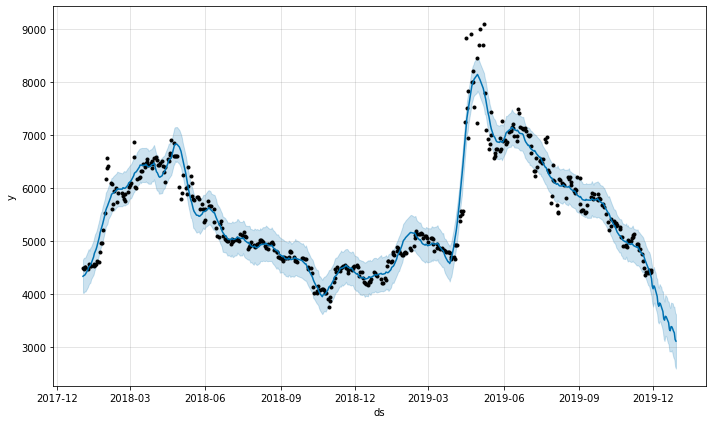

In [6]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

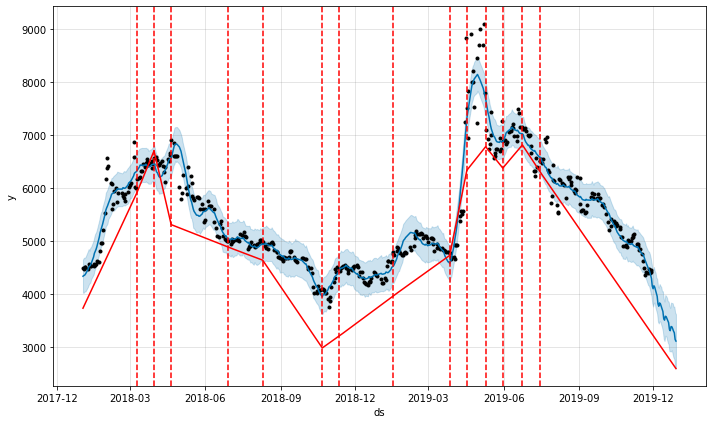

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [8]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:470]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

250.14023843964563

In [9]:
B = fdr.DataReader('014130', '2019-12-01', '2019-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-02,4420,4455,4320,4320,41392,-0.028121
2019-12-03,4280,4300,4210,4275,35272,-0.010417
2019-12-04,4230,4270,4205,4230,21601,-0.010526
2019-12-05,4200,4270,4075,4090,56999,-0.033097
2019-12-06,4040,4265,4040,4220,61236,0.031785
2019-12-09,4220,4375,4220,4315,48264,0.022512
2019-12-10,4455,4540,4155,4170,100646,-0.033604
2019-12-11,4135,4210,4125,4165,39771,-0.001199
2019-12-12,4160,4265,4160,4210,38623,0.010804


In [10]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-12-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     int64  
 1   High    20 non-null     int64  
 2   Low     20 non-null     int64  
 3   Close   20 non-null     int64  
 4   Volume  20 non-null     int64  
 5   Change  20 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [11]:
B['ds'] = B.index

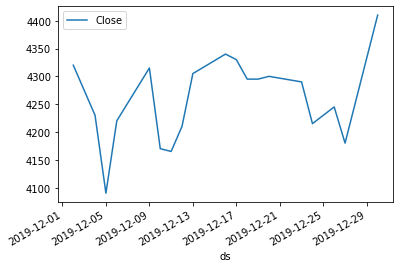

In [12]:
B.plot(x='ds', y='Close')

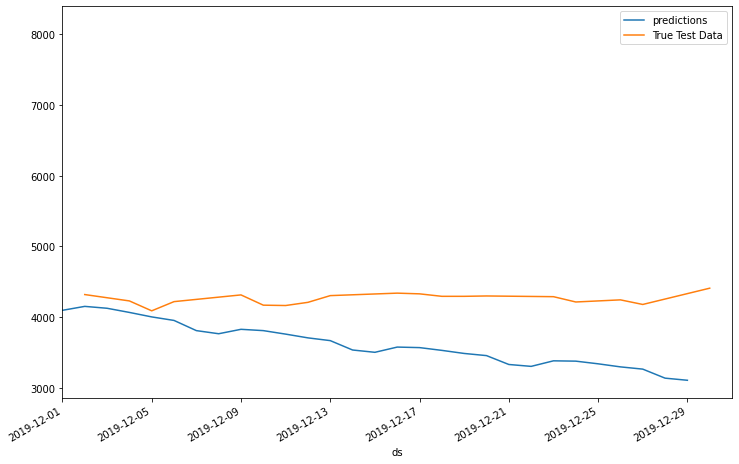

In [13]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2019-12-01', '2019-12-31'))